# Getting started with Basemap: Post 1

This tutorial introduces the nitty gritties of plotting 2D and 3D data on Geographical Maps by using [Matplotlib Basemap toolkit](http://matplotlib.org/basemap/users/intro.html).
As part of the term project for Applied Machine Learning course at McGill University in Fall 2016, we were given the task of predicting various behaviours of animal movement aimed at conservation of the species. The data is in the form of time series and can be otained at [movebank](https://www.movebank.org/), which is a repository of animal tracking data accumulated from various scientific studies. My team had chosen to analyze the migratory behaviour of Lesser Black-backed Gulls birds. The reference paper and the data can be found [here](https://www.datarepository.movebank.org/handle/10255/move.494).

This is the first notebook which I have created to walk you through the project. In this notebook, I will get you accustomed to the data and concentrate on plotting the data on a world map. In the posts to follow some data cleansing will be done, we will see in detail what movebank has to offer to the machine learning community in terms of data and literature. I will then briefly talk about the problems we had tackled. We will then walk through some unsupervised learning algorithms and subsequently delve into deeper models.

Before starting with the making pretty plots, take note of some important links:
1. You can find the project report, code and any addiotnal links in my [git repository](https://github.com/Pulkit-Khandelwal/COMP551-Applied-Machine-Learning/tree/master/Capstone%20Project).
2. I stumbled upon a very sexy library [plot.ly](https://plot.ly/) which makes visualizations easier for data scientists.
3. [This](http://blog.kaggle.com/2016/11/30/seventeen-ways-to-map-data-in-kaggle-kernels/) blog post on Kaggle helped me with the plots and should serve the same purpose to you.

Appropriate credits should be given to my teammates:
[Chris](https://github.com/cdglasz) and [Vincent](https://github.com/DjAntaki)

Let's get started!

# The Data
First, let's see what the data looks like by using Pandas. You can download part of the data [here](https://github.com/Pulkit-Khandelwal/blogs-notebooks/tree/master/Basemap). The file is named "migration_simplified.csv". This is a much condensed version of the original data but serves the purpose for this tutorial.
You can see the timestamp, the latitude and longitudinal data during the migration of birds.

In [39]:
#import the required libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import Axes3D
import pylab

#get the data using pandas
df = pd.read_csv('migration_simplified.csv')

#display the header and see first few entirs in the dataset
print df.head()


   Unnamed: 0                timestamp  location-long  location-lat
0           0  2009-05-27 14:00:00.000       24.58617      61.24783
1           1  2009-05-27 20:00:00.000       24.58217      61.23267
2           2  2009-05-28 05:00:00.000       24.53133      61.18833
3           3  2009-05-28 08:00:00.000       24.58200      61.23283
4           4  2009-05-28 14:00:00.000       24.58250      61.23267


# Plot the migration path of the birds on a Wolrd Map
Next, we plot the positions of the birds as they travel. Basemap is pretty easy to get started with. I have plotted the data on a part of the world map. This is quite useful especially when you want to zoom into a certain area of the world. Here, a map has been displayed between the laitudes 30S and 70N; longitudes between 10W and 90E.

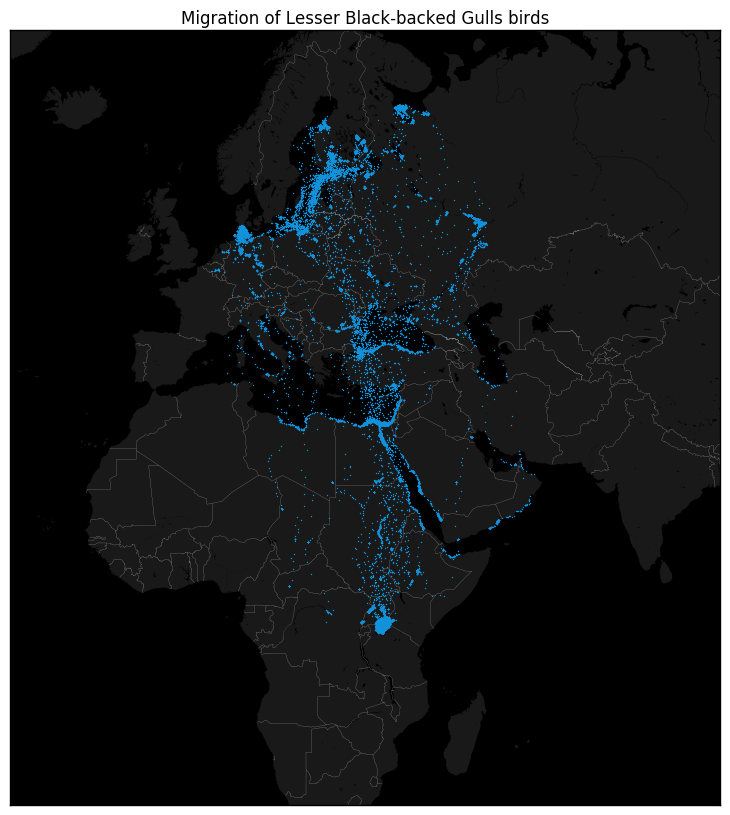

In [35]:
#initialise the figure object
fig = plt.figure(figsize=(14,10))

#initialise the Map using Basemap. You can manually set the area of the world you want to 
#be displayed. You can also get various variations of the maps.

m = Basemap(projection='merc', llcrnrlat=-30., urcrnrlat=70.,
            llcrnrlon=-30., urcrnrlon=90., resolution='i')

m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.1, color="w")              # draw countries

#extract the coordinates into the variables x and y
x, y = m(df['location-long'].values, df['location-lat'].values)


#plot the positions of the birds as they migrate using the scatter plot.
#Refer the documentation of Basemap for a better understanding of the various parameters
m.scatter(x, y, c="#1292db", lw=0, alpha=1, zorder=5, s = 1)

#title for the image
plt.title("Migration of Lesser Black-backed Gulls")

#save a high resolution image
pylab.savefig('migration.png',dpi=1000)

#plot the image
plt.show()



Below is a not so pretty plot :/ But, this might serve for some other task. See! How good Basemap is!

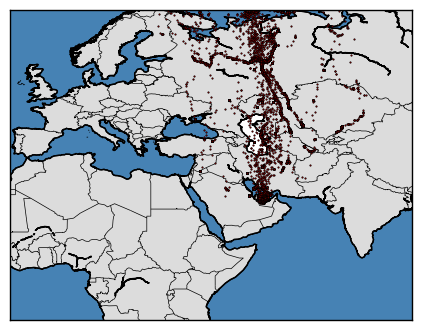

In [52]:
map = Basemap(llcrnrlon=-10.,llcrnrlat=-10.,urcrnrlon=90.,urcrnrlat=70.,resolution = 'l',area_thresh = 100000.0,projection='gall')

map.drawcoastlines()
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'gainsboro')
map.drawmapboundary(fill_color='steelblue')

xs, ys = m(df['location-long'].values, df['location-lat'].values)
map.plot(xs,ys,'ro',markersize=1)

plt.show()

# Visualize a bird's trajectory in 3D
Let's plot the trajectory of a bird's migration. We get a sexy plot! Don't we?
The data for this can found [here](https://github.com/Pulkit-Khandelwal/blogs-notebooks/tree/master/Basemap) and is named migration_original.csv.

/Users/pulkit/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



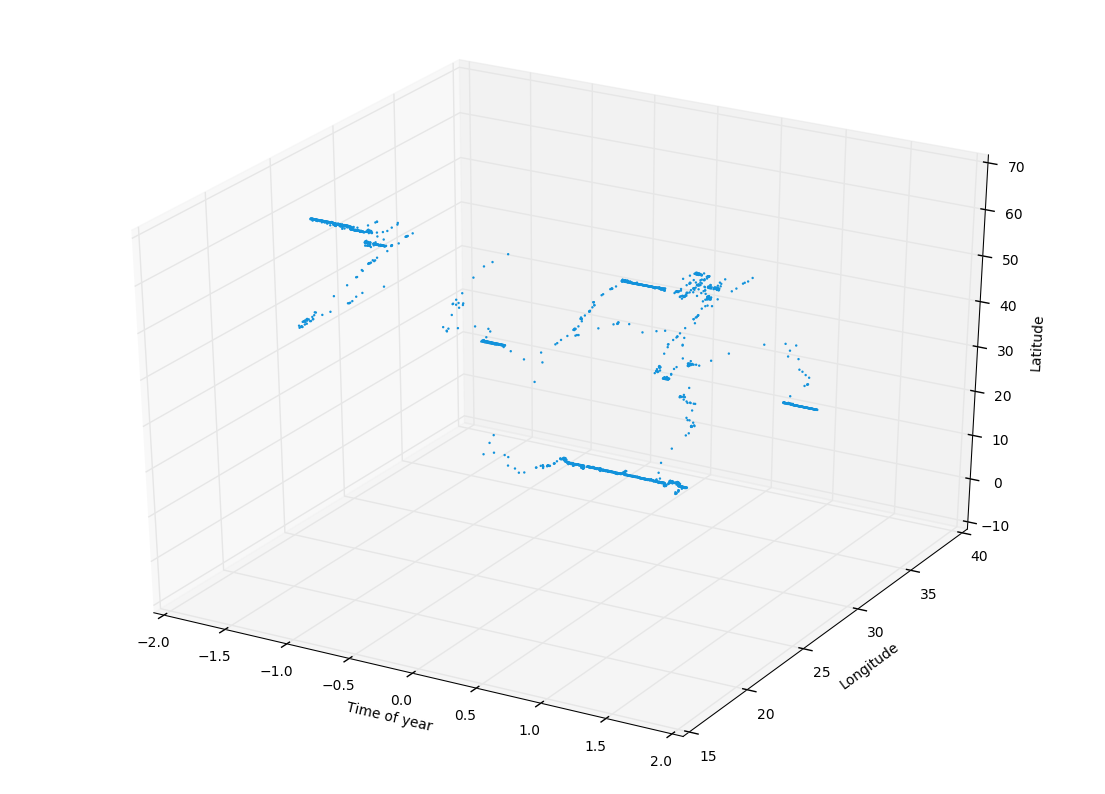

In [73]:
def plot_3d(df):
    #initialise a figure object
    fig = plt.figure(figsize=(14,10))
    
    #add a 3D object
    ax = fig.add_subplot(111, projection='3d')
    
    #scatter plot
    ax.scatter(df['event-id'], df['location-long'], df['location-lat'], c="#1292db", lw=0, alpha=1, zorder=5, s = 3)
    
        
    ax.set_xlabel('Time of Year')
    ax.set_ylabel('Longitude')
    ax.set_zlabel('Latitude')

    plt.show()
    
d = pd.read_csv('migration_original.csv')
#91732 is the id of the bird whose trajectory we are interested in.
#feel free to change the id of the bird
k = d.loc[d['tag-local-identifier'] == 91732]

#normalise the time axis
#use the event-id to determine the time stamp
#Note: event-id is in increasing order between a range of numbers,
#so we can easily normalise for a given bird
#In the next post, I will plot using time-stamps
#and that will make things more clear

k['event-id'] = (k['event-id'] - k['event-id'].mean())/k['event-id'].std(ddof=0)

plot_3d(k)

#Ignore the warning below :p

# What's Next?
In the next few posts to follow I will formally the introduce the problems that we have dealt with, will have a closer look at the time series data and then run some deep learning models to predict the bird's behaviour!
I hope you enjoyed this post.
You can reach me at pulkit.khandelwal@mail.mcgill.ca with questions or comments.
See you soon!
Check out my new website [here](https://sites.google.com/view/pulks-khan).